# Lectura y graficación de una señal almacenada en un archivo txt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [ ]:
f = open("ECG.txt","r")
raw_data = f.readline()  # con f.read() leemos todo el contenido
f.close()

raw_data

'# OpenSignals Text File Format. Version 1\n'

In [ ]:
#Definimos la frecuencia
x = 1000
print(x)

1000


In [ ]:
Fs = float(x)
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000.0 hz
 Ts=0.001 s


## Leemos el archivo excluyendo las primeras filas del archivo

In [ ]:
array = np.genfromtxt("ECGCarlos.txt", delimiter="\t",skip_header = 3)
array

array([[  0.,   0.,   0., ...,   0., 477.,  nan],
       [  1.,   0.,   0., ...,   0., 477.,  nan],
       [  2.,   0.,   0., ...,   0., 480.,  nan],
       ...,
       [  1.,   0.,   0., ...,   0., 508.,  nan],
       [  2.,   0.,   0., ...,   0., 516.,  nan],
       [  3.,   0.,   0., ...,   0., 519.,  nan]])

In [ ]:
#Extraemos la columna de la señal
signal = array[:, 5]
signal

array([477., 477., 480., ..., 508., 516., 519.])

In [ ]:
#Obtenemos la longitud de la señal
n = len(signal)
n

62100

In [ ]:
#Creamos un vector tiempo conociendo n y Ts
n = 2000 #Queremos graficar 2 segundos de la señal
t = np.arange(0,n*Ts,Ts)
len(t)

2000

In [ ]:
signal2 = signal[:2000] #Obtenemos los primeros 2000 valores de nuestra señal
len(signal2)

2000

## Ploteamos la lectura

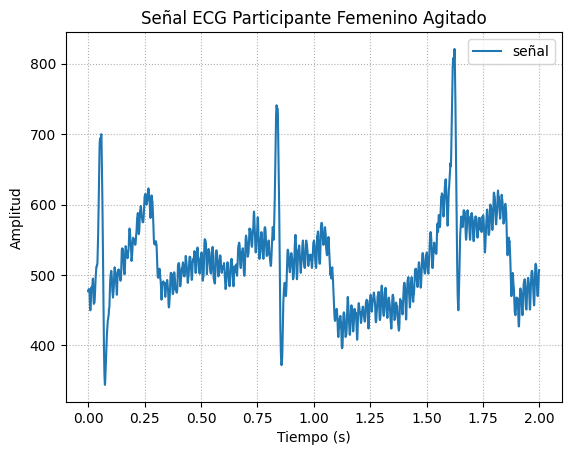

In [ ]:
plt.plot(t, signal2, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.title("Señal ECG Participante Femenino Agitado")
plt.show()

## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

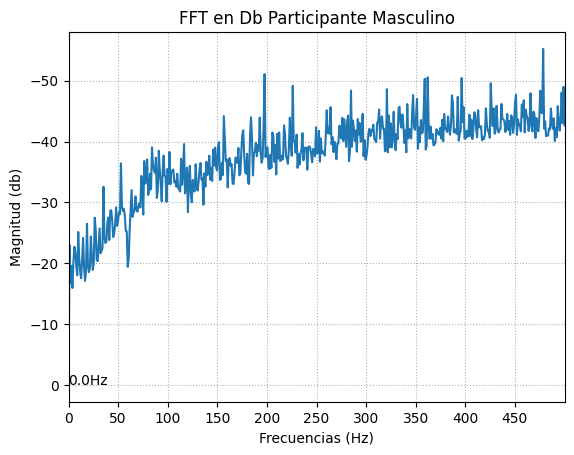

In [ ]:
N = 2**10                                     # 10 bits, 0-1023

#signal1 = array[:,1]

signal_fft = np.fft.fft(signal2, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en Db Participante Masculino")
plt.xlim([0,500])
plt.gca().invert_yaxis()
plt.xticks(np.arange(0,500,50))
plt.show()